#### Libraries.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Plot 1.

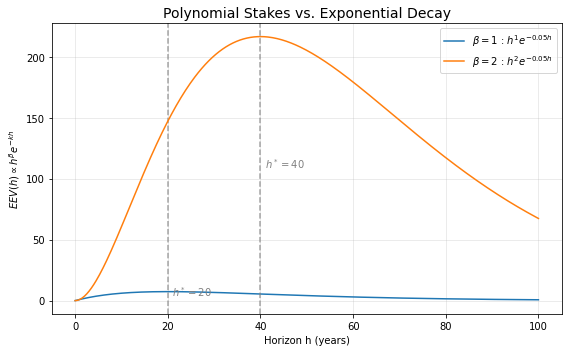

In [9]:
k = 0.05
beta_values = [1, 2]
h = np.linspace(0, 100, 400)  # horizon in years

# Function for EEV(h)
def eev(h, beta, k):
    return (h ** beta) * np.exp(-k * h)

# Plot setup
plt.figure(figsize=(8, 5))

for beta in beta_values:
    y = eev(h, beta, k)
    plt.plot(h, y, label=f"$\\beta = {beta}$ : $h^{{{beta}}} e^{{-{k}h}}$")
    # Mark theoretical peak at h* = β / k
    h_star = beta / k
    plt.axvline(h_star, color='gray', linestyle='--', alpha=0.7)
    plt.text(h_star + 1, max(y)*0.5, f"$h^* = {h_star:.0f}$", color='gray')

# Aesthetics
plt.title("Polynomial Stakes vs. Exponential Decay", fontsize=14)
plt.xlabel("Horizon h (years)")
plt.ylabel(r"$EEV(h) \propto h^{\beta} e^{-kh}$")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### Plot 2.

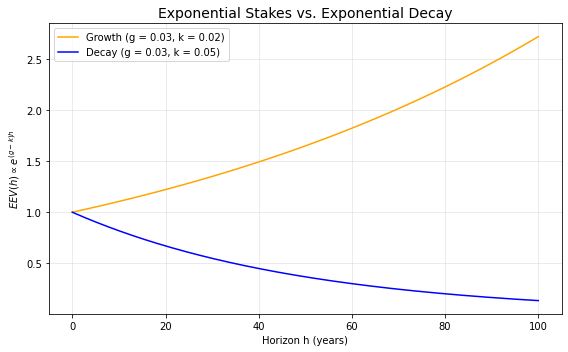

Table of normalized values (EEV normalized to 1 at h=0):

Growth (g = 0.03, k = 0.02):  [1.28 1.65 2.12 2.72]
Decay (g = 0.03, k = 0.05):  [0.61 0.37 0.22 0.14]


In [10]:
h = np.linspace(0, 100, 400)  # horizon in years

# Two illustrative cases
cases = [
    {"g": 0.03, "k": 0.02, "label": "Growth (g = 0.03, k = 0.02)", "color": "orange"},
    {"g": 0.03, "k": 0.05, "label": "Decay (g = 0.03, k = 0.05)", "color": "blue"}
]

# Function for EEV(h)
def eev(h, g, k):
    return np.exp((g - k) * h)

# Plot
plt.figure(figsize=(8, 5))
for c in cases:
    y = eev(h, c["g"], c["k"])
    plt.plot(h, y, label=c["label"], color=c["color"])

plt.title("Exponential Stakes vs. Exponential Decay", fontsize=14)
plt.xlabel("Horizon h (years)")
plt.ylabel(r"$EEV(h) \propto e^{(g - k)h}$")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Optional: reproduce table values
h_points = [25, 50, 75, 100]
print("Table of normalized values (EEV normalized to 1 at h=0):\n")
for c in cases:
    g, k = c["g"], c["k"]
    values = np.exp((g - k) * np.array(h_points))
    print(f"{c['label']}: ", np.round(values, 2))

#### Plot 3.

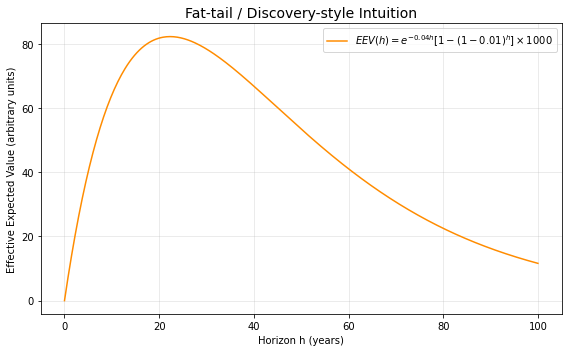

 h(y)  1 - (1 - p)^h (discovery prob.)  e^(-0.04h) (skill)  EEV(h)
   10                            0.096               0.670   64.09
   25                            0.222               0.368   81.73
   50                            0.395               0.135   53.46
   75                            0.529               0.050   26.36
  100                            0.634               0.018   11.61


In [11]:
# Parameters
p = 0.01   # annual discovery probability
L = 1000   # payoff
k = 0.04   # decay rate
h = np.linspace(0, 100, 400)  # horizon in years

# Model components
discovery_prob = 1 - (1 - p)**h           # chance of at least one discovery by year h
skill = np.exp(-k * h)                    # forecasting skill decay
EEV = skill * discovery_prob * L          # effective expected value

# Plot
plt.figure(figsize=(8, 5))
plt.plot(h, EEV, color="darkorange", label=r"$EEV(h) = e^{-0.04h}[1-(1-0.01)^h] \times 1000$")
plt.title("Fat-tail / Discovery-style Intuition", fontsize=14)
plt.xlabel("Horizon h (years)")
plt.ylabel("Effective Expected Value (arbitrary units)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Table for selected horizons
h_points = np.array([10, 25, 50, 75, 100])
discovery_vals = 1 - (1 - p)**h_points
skill_vals = np.exp(-k * h_points)
eev_vals = skill_vals * discovery_vals * L

# Display neatly as a table
df = pd.DataFrame({
    "h(y)": h_points,
    "1 - (1 - p)^h (discovery prob.)": np.round(discovery_vals, 3),
    "e^(-0.04h) (skill)": np.round(skill_vals, 3),
    "EEV(h)": np.round(eev_vals, 2)
})

print(df.to_string(index=False))